<a href="https://colab.research.google.com/github/Tdas-christ/CV/blob/main/Tanisha_2348569_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
def ideal_low_pass_filter(image, cutoff_frequency):
    # Convert the image to float32
    image_float32 = np.float32(image)

    # Perform Fourier Transform
    f_transform = cv2.dft(image_float32, flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Create Ideal Low Pass Filter mask
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center_row)**2 + (j - center_col)**2) <= cutoff_frequency:
                mask[i, j] = 1

    # Apply the filter
    f_filtered = f_transform_shifted * mask

    # Shift the zero frequency component back to the corner
    f_filtered_shifted = np.fft.ifftshift(f_filtered)

    # Perform Inverse Fourier Transform
    img_filtered = cv2.idft(f_filtered_shifted)
    img_filtered = cv2.magnitude(img_filtered[:, :, 0], img_filtered[:, :, 1])

    return cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)

In [3]:
def ideal_high_pass_filter(image, cutoff_frequency):
    # Convert the image to float32
    image_float32 = np.float32(image)

    # Perform Fourier Transform
    f_transform = cv2.dft(image_float32, flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Create Ideal High Pass Filter mask
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center_row)**2 + (j - center_col)**2) <= cutoff_frequency:
                mask[i, j] = 0

    # Apply the filter
    f_filtered = f_transform_shifted * mask

    # Shift the zero frequency component back to the corner
    f_filtered_shifted = np.fft.ifftshift(f_filtered)

    # Perform Inverse Fourier Transform
    img_filtered = cv2.idft(f_filtered_shifted)
    img_filtered = cv2.magnitude(img_filtered[:, :, 0], img_filtered[:, :, 1])

    return cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)

In [6]:
# Read the input image
img = cv2.imread('/content/drive/MyDrive/IMAGES (CV)/WALL-E_(character).jpg', 0)

In [7]:
# Define the cutoff frequency for the filters
cutoff_frequency_low_pass = 30
cutoff_frequency_high_pass = 30

In [8]:
# Apply Ideal Low Pass Filter
filtered_image_low_pass = ideal_low_pass_filter(img, cutoff_frequency_low_pass)

# Apply Ideal High Pass Filter
filtered_image_high_pass = ideal_high_pass_filter(img, cutoff_frequency_high_pass)

Original Image:


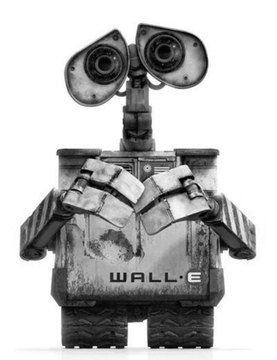

Filtered Image (Low Pass)


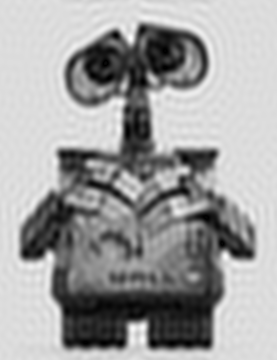

Filtered Image (High Pass)


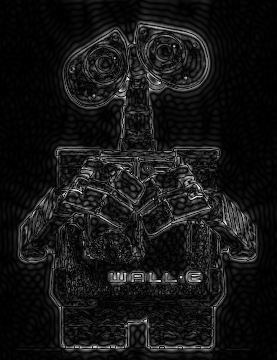

In [9]:
# Display the filtered images
print('Original Image:')
cv2_imshow(img)
print('Filtered Image (Low Pass)')
cv2_imshow(filtered_image_low_pass.astype(np.uint8))
print('Filtered Image (High Pass)')
cv2_imshow(filtered_image_high_pass.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()